# Momentum Budget closure in MOM6
*Contributors:* [Hemant Khatri](https://github.com/hmkhatri), [Stephen Griffies](https://github.com/StephenGriffies)

Here, we outline the terms required to close the momentum budget in MOM6. Simialr to tracer budgets, the momentum budget closes on the native grid as well as on the remapped diagnostic grid ($z^*$ and $\rho_2$).

## Governing equations

As discussed in Appendix A to [Adcroft et al. 2019]( https://doi.org/10.1029/2019MS001726), MOM6 discretizes the vector-invariant velocity equation. This equation takes on the following continuous space-time form using a generalized vertical coordinate $s = s(x,y,z,t)$

$$
\left[ \frac{\partial \mathbf{u}}{\partial t} \right]_{s} =
- \left[ \frac{f + \zeta}{h} \right] \hat{\mathbf{z}} \wedge (h \, \mathbf{u}) 
- w^{(\dot{s})} \, \frac{\partial \mathbf{u}}{\partial z} -\left[ \rho^{-1} \, \nabla_s \, p + \nabla_s \Phi \right]
- \nabla_{s} K 
+ \boldsymbol{F}^{{\text{horz frict}}}
+ \boldsymbol{F}^{{\text{vert frict}}}
+ \rho^{-1} \, \boldsymbol{\tau}^{\text{bound}} 
\label{eq:continuous-velocity-equation}
$$

where we have 

\begin{eqnarray}
\boldsymbol{v} = \boldsymbol{u} + \hat{\boldsymbol{z}} \, w
= \hat{\boldsymbol{x}} \, u  +  \hat{\boldsymbol{y}} \, v
 + \hat{\boldsymbol{z}} \, w & & \qquad \mbox{velocity} \\
\nabla_{s} = \hat{\boldsymbol{x}} \left[ \frac{\partial}{\partial x} \right]_{s} +
\hat{\boldsymbol{y}} \left[ \frac{\partial}{\partial y} \right]_{s}
& & \qquad \mbox{horizontal gradient on $s$-surface} \\
w^{(\dot{s})} = \frac{\partial z}{\partial s} \, \frac{\mathrm{D}s}{\mathrm{D}t}
& & \qquad \mbox{dia-surface velocity used for remapping} \\
\zeta = \left[ \frac{\partial v}{\partial x} \right]_{s} 
        -\left[ \frac{\partial u}{\partial y} \right]_{s} 
& & \qquad \mbox{$s$-coordinate vertical vorticity} \\
\Phi = g \, z & & \qquad 
\mbox{geopotential (more complex when have tides)} \\
-\rho^{-1} \, \nabla_{z}p  = 
-\left[ \rho^{-1} \, \nabla_s \, p + \nabla_s \Phi \right] & & \qquad \mbox{horizontal pressure acceleration} \\
K = \frac{u^{2} + v^{2}}{2}  & & \qquad \mbox{horizontal kinetic energy per unit mass} \\
\boldsymbol{F}^{{\text{horz frict}}} 
& & \qquad \mbox{horiz friction from horz shear} \mbox{Laplacian or biharmonic} \\
\boldsymbol{F}^{{\text{vert frict}}}
& & \qquad  \mbox{vert friction from vertical shear} \mbox{Laplacian} \\
\rho^{-1} \, \boldsymbol{\tau}^{{\text{bound}}}
& & \qquad  \mbox{boundary frictional acceleration} \mbox{wind, bottom drag, etc.}
\end{eqnarray}

The hydrostatic pressure, $p$, arises from the weight per horizontal area above a point in the fluid, and it has a boundary condition at the sea surface, $z=\eta(x,y,t)$, set by the pressure applied by the overlying atmosphere and ice, $p(z=\eta)=p_{\text{\applied}}$. The external quantities include the vertical component of planetary vorticity $f=2\Omega \sin \phi$ and the gravitational potential $\Phi = g \, z$.  Finally, $\boldsymbol{F}$ is the acceleration due to the divergence of stresses including those provided through boundary interactions.

## Diagnosing terms in the discrete velocity equation

In this section we document how to diagnose terms in the MOM6 velocity equation. The velocity equation shown above is discretized in MOM6 by assuming the variables are constant within a grid cell layer according to 

\begin{equation}
 \boldsymbol{u} \rightarrow \boldsymbol{u}_{k}
 \qquad 
 h \rightarrow h_{k}
 \qquad 
 \zeta \rightarrow \zeta_{k}
 \qquad 
 p \rightarrow p_{k}
 \qquad 
 \mbox{etc.,}
\end{equation}

where $k$ is a cell index that increases downward. MOM6 then provides particular space and time discretizations of accelerations from the local time derivative, Coriolis, nonlinear vorticity, remapping, pressure, friction, boundaries. We are not concerned here with details for how the terms are discretized. Rather, we articulate the diagnostic terms required to close the velocity budget over a grid cell, and to identify where further diagnostics need to be coded. The table below summarizes these diagnostics and the tasks needed to close the budget.

| Process | Term  | Diagnostic Name   | 
| :----------------- | :-----------------: | :----------------- | 
| Velocity tendency | $\left[ \frac{\partial \mathbf{u}}{\partial t} \right]_{s}$ | `dudt, dvdt` |
| Coriolis and kinetic energy gradient acceleration| $-\left[ \frac{f + \zeta}{h} \right] \hat{\mathbf{z}} \wedge (h\,\mathbf{u})- \nabla_{s}K $ | `CAu, CAv` | 
| Nonlinear Coriolis acceleration| $- \left[ \frac{\zeta}{h} \right] \hat{\mathbf{z}} \wedge (h \, \mathbf{u})$ | `rvxv, rvxu` | 
| Kinetic energy gradient acceleration | $- \nabla_{s} K$ | `gKEu, gKEv` | 
| Pressure acceleration (baroclinic contribution) | $-\left[ \rho^{-1} \, \nabla_s \, p + \nabla_s \Phi \right]^{\text{baroclinic}}$ | `PFu, PFv` | 
| Pressure acceleration (barotropic contribution) | $-\left[ \rho^{-1} \, \nabla_s \, p + \nabla_s \Phi \right]^{\text{barotropic}}$ | `u_BT_accel, v_BT_accel` | 
| Horizontal friction acceleration | $\boldsymbol{F}^{{\text{horz frict}}}$ | `diffu, diffv` | 
| Verical friction and boundary stress acceleration | $\boldsymbol{F}^{{\text{vert frict}}} + \rho^{-1} \, \boldsymbol{\tau}^{\text{bound}}$ | `du_dt_visc, dv_dt_visc` | 
 
The sign convention is such that the grid-cell time tendency is equal to the sum of all the other terms. For example, in the case of zonal momentum equation

```dudt = CAu + PFu + u_BT_accel + diffu + du_dt_visc + ```residual due to vertical remapping

### Note
1. An online diagnostic for vertical remapping term $w^{(\dot{s})} \, \frac{\partial \mathbf{u}}{\partial z}$ is currently not available in MOM6. Nethertheless, this term is expected to be small in comparison to other diagnostic terms. We confirm this when we anlyze plots of momentum budget terms later in this tutorial. Also, the vertical remapping term vanishes in the isopycnal layered configuration. 
2. The contribution due to linear Coriolis term $- \left[ \frac{f}{h} \right] \hat{\mathbf{z}} \wedge (h \, \mathbf{u})$ can be computed as  `CAu - rvxv - gKEu`, `CAv - rvxu - gKEv`.
3. Two separate diagnostics are saved for pressure accelaration term (barotropic and baroclinic) because MOM6 uses a barotropic-baroclinic split scheme for integrating the velocity equation in time. The net pressure force accelaration is the sum of these two diagnostics.
4. Contribution from vertical friction, surface wind stress and bottom friction are combined into one single diagnostic. It is tricky to compute individual components. We discuss this issue in more detail later when we look at depth-averaged momentum budgets.

## Budget for depth-averaged velocity

In the vertical discretized form, the depth-averaged velocity (or barotropic) as given by 

\begin{equation}
  \overline{\boldsymbol{u}} = 
  \frac{ \sum_{k} h_{k} \, \boldsymbol{u}_{k}}{\sum_{k} h_{k}}
  =
  \sum_{k} (h_{k}/H) \, \boldsymbol{u}_{k}.
\label{eq:barotropic-velocity}
\end{equation}
\begin{equation}
     H = \sum_{k} h_{k}
 \end{equation}
 
For the Boussinesq version of MOM6, $h_{k}$ is the thickness of layer $k$ and $H$ is the full column depth.

We are here interested in diagnosing terms that lead to the time evolution of $\overline{\boldsymbol{u}}$. Notably, the diagnostic features in the barotropic portion of MOM6 are not suited to directly diagnosing terms in the barotropic velocity equation.  Instead, we make use of the layerwise velocity budget and vertically integrate. As seen below, this approach gets us nearly everything, and yet there is a need diagnose one term offline via residual. 

The time derivative of the depth averaged velocity is 

\begin{equation}
    \frac{\partial}{\partial t} 
    \left[ \sum_{k} (h_{k}/H) \, \boldsymbol{u}_{k}
    \right] = \left[ \sum_{k} (h_{k}/H) \, \partial_{t} \boldsymbol{u}_{k} +  \sum_{k} \partial_{t} (h_{k}/H) \, \boldsymbol{u}_{k} \right].
\label{eq:time-derivative-barotropic}
\end{equation} 

 The first term on the right hand side is the vertical integral of each contribution to $\partial_{t} \boldsymbol{u}_{k}$ as listed in table above. We have updated MOM6 to perform the online fractional-thickness weighting of these terms and the diagnostics are listed in table below. 
 
 The first term on the RHS of equation \eqref{eq:time-derivative-barotropic} arises from time changes to the relative thickness of a layer,
 $\partial_{t} (h_{k}/H)$, as multiplied by the velocity.  This term is not readily diagnosed in MOM6. We thus propose an indirect manner to obtain this term by  diagnosing the left hand side of equation \eqref{eq:time-derivative-barotropic} according to
\begin{equation}
    \frac{\partial \overline{u}}{\partial t} 
    \approx 
    \frac{\overline{u}(\tau + \Delta \tau)
          - \overline{u}(\tau)}{\Delta \tau},
\end{equation}
which requires diagnostic information about both the updated and prior values for the depth-averaged velocity, $\overline{u}$.  Assuming we have that information allows us to perform an offline diagnosis   
\begin{equation}
\sum_{k} \partial_{t} (h_{k}/H) \, \boldsymbol{u}_{k}
 =
  \frac{\overline{u}(\tau + \Delta \tau)
          - \overline{u}(\tau)}{\Delta \tau}
 -
 \sum_{k} (h_{k}/H) \, \partial_{t} \boldsymbol{u}_{k}.
 \label{eq:thickness-barotropic}
\end{equation}

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from xgcm import Grid
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob, os

from dask.distributed import Client
from dask.distributed import LocalCluster
cluster = LocalCluster()
client = Client(cluster)
print(client)

<Client: 'tcp://127.0.0.1:41513' processes=8 threads=56, memory=66.80 GB>


In [2]:
# Functions for plotting

def plot_map(ax, da, vmin=-999, vmax=999, vstep=1,
             lon='geolon', lat='geolat', cmap='RdBu_r', title='what is it?'):
    
    contours = np.arange(vmin, vmax+vstep, vstep)
    
    p = da.plot(ax=ax, x=lon, y=lat, vmin=vmin, vmax=vmax, cmap=cmap, 
                transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False)
    
    # add separate colorbar
    cb = plt.colorbar(p, ax=ax, format='%.1e', extend='both', shrink=0.6)
    cb.ax.tick_params(labelsize=12)

    p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    
    _ = plt.title(title, fontsize=14)
    return fig

In [5]:
ds = xr.open_dataset("../../OM125_monthly.nc")

print(ds)

<xarray.Dataset>
Dimensions:           (nv: 2, xh: 2880, xq: 2880, yh: 2240, yq: 2240)
Coordinates:
  * nv                (nv) float64 1.0 2.0
    time              object ...
  * xq                (xq) float64 -298.5 -298.4 -298.3 ... 61.12 61.23 61.35
  * yh                (yh) float64 -83.62 -83.58 -83.54 ... 89.86 89.92 89.97
  * xh                (xh) float64 -298.6 -298.5 -298.4 ... 61.05 61.16 61.28
  * yq                (yq) float64 -83.6 -83.56 -83.52 ... 89.89 89.95 90.0
    geolat            (yh, xh) float32 ...
    geolat_c          (yq, xq) float32 ...
    geolat_u          (yh, xq) float32 ...
    geolat_v          (yq, xh) float32 ...
    geolon            (yh, xh) float32 ...
    geolon_c          (yq, xq) float32 ...
    geolon_u          (yh, xq) float32 ...
    geolon_v          (yq, xh) float32 ...
Data variables:
    average_DT        timedelta64[ns] ...
    average_T1        object ...
    average_T2        object ...
    hf_CAu_2d         (yh, xq) float32 ...
   

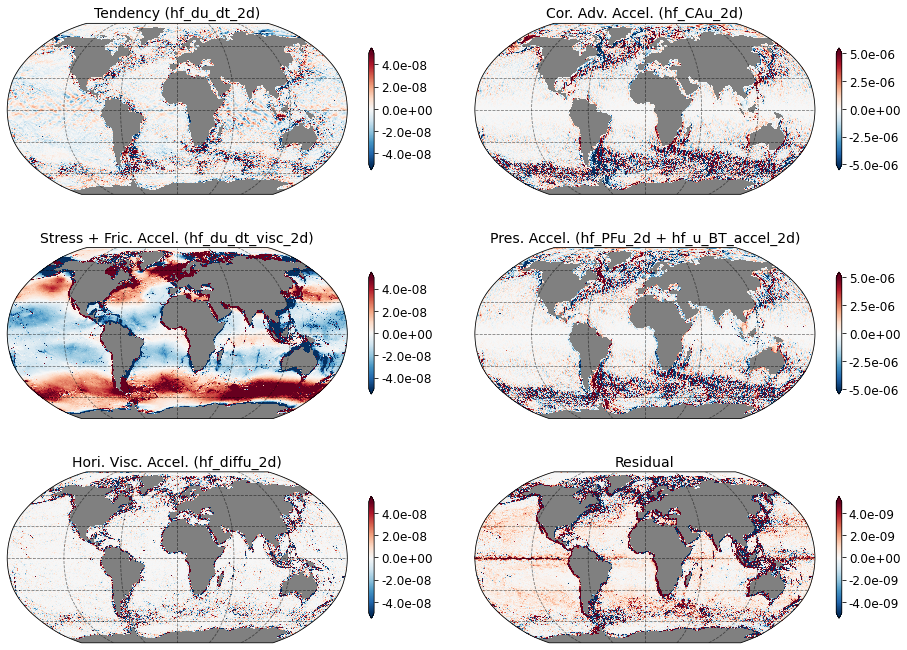

In [8]:
# Zonal Momentum budget
max_r = 0.5e-5

grid = plt.GridSpec(3, 2, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[16,12])

ax = fig.add_subplot(grid[0, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, ds['hf_dudt_2d'], vmin=-1e-2*max_r, vmax=1e-2*max_r, vstep=2.e-3*max_r,
                   lon='geolon_u', lat='geolat_u', cmap='RdBu_r', title='Tendency (hf_du_dt_2d)')

ax = fig.add_subplot(grid[0, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, ds['hf_CAu_2d'], vmin=-max_r, vmax=max_r, vstep=2.e-1*max_r,
                   lon='geolon_u', lat='geolat_u', cmap='RdBu_r', title='Cor. Adv. Accel. (hf_CAu_2d)')

ax = fig.add_subplot(grid[1, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, ds['hf_PFu_2d']+ds['hf_u_BT_accel_2d'], vmin=-max_r, vmax=max_r, vstep=2.e-1*max_r,
                   lon='geolon_u', lat='geolat_u', cmap='RdBu_r', title='Pres. Accel. (hf_PFu_2d + hf_u_BT_accel_2d)')
    
ax = fig.add_subplot(grid[1, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, ds['hf_du_dt_visc_2d'], vmin=-1e-2*max_r, vmax=1e-2*max_r, vstep=2.e-3*max_r,
                   lon='geolon_u', lat='geolat_u', cmap='RdBu_r', title='Stress + Fric. Accel. (hf_du_dt_visc_2d)')

ax = fig.add_subplot(grid[2, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, ds['hf_diffu_2d'], vmin=-1e-2*max_r, vmax=1e-2*max_r, vstep=2.e-3*max_r,
                   lon='geolon_u', lat='geolat_u', cmap='RdBu_r', title='Hori. Visc. Accel. (hf_diffu_2d)')

tmp = ds['hf_dudt_2d']-ds['hf_CAu_2d']-ds['hf_PFu_2d']-ds['hf_diffu_2d']-ds['hf_du_dt_visc_2d']-ds['hf_u_BT_accel_2d']
ax = fig.add_subplot(grid[2, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, tmp, vmin=-1e-3*max_r, vmax=1e-3*max_r, vstep=2.e-4*max_r,
                   lon='geolon_u', lat='geolat_u', cmap='RdBu_r', title='Residual')

Momentum budget closes with monthly-averaged terms. Small residual is due to vertical remapping term, which need not be zero in the vertical average. Contribution from vertical remapping term is not available as a diagnostic. Nevertheless, the term is much smaller than the individual budget terms. We also checked daily-averaged budget terms, which also close the momentum budget reasonably well. The only dfference is that velocity tendency term tends to be much larger in daily-averaged data, which is expected.

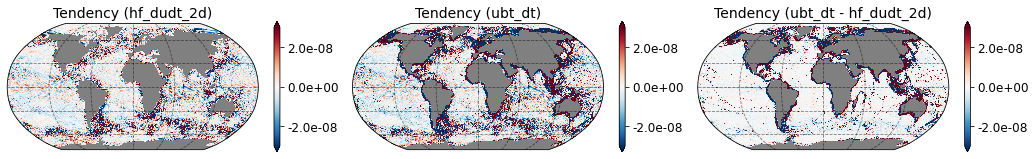

In [9]:
# Difference between barotropic tendency and depth-averaged tendency terms

max_r = 0.3e-5

grid = plt.GridSpec(1, 3, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[18,4])

ax = fig.add_subplot(grid[0, 0], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, ds['hf_dudt_2d'], vmin=-1e-2*max_r, vmax=1e-2*max_r, vstep=2.e-3*max_r,
                   lon='geolon_u', lat='geolat_u', cmap='RdBu_r', title='Tendency (hf_dudt_2d)')

ax = fig.add_subplot(grid[0, 1], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, ds['ubt_dt'] , vmin=-1e-2*max_r, vmax=1e-2*max_r, vstep=2.e-3*max_r,
                   lon='geolon_u', lat='geolat_u', cmap='RdBu_r', title='Tendency (ubt_dt)')

ax = fig.add_subplot(grid[0, 2], projection=ccrs.Robinson(),facecolor='grey')
_ = plot_map(ax, ds['ubt_dt'] - ds['hf_dudt_2d'], vmin=-1e-2*max_r, vmax=1e-2*max_r, vstep=2.e-3*max_r,
                   lon='geolon_u', lat='geolat_u', cmap='RdBu_r', title='Tendency (ubt_dt - hf_dudt_2d)')

In [10]:
ds.close()
client.close()
cluster.close()